In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1.

<h3>Wczytanie i wyświetlenie obrazu</h3>

In [6]:
from skimage import io

IMG_PATH = "images/"
IMG_NAME = "car.jpg"
img = io.imread(IMG_PATH + IMG_NAME)

# set default image size
plt.rcParams["figure.figsize"] = (15, 5)

# show images in row
def show_images(images, titles, cmaps=None):
    _, axes = plt.subplots(1, len(images))
    if cmaps:
        for ax, im, tt, cm in zip(np.atleast_1d(axes), images, titles, cmaps):
            ax.axis("off")
            ax.set_title(tt)
            ax.imshow(im, cmap=cm)
    else:
        for ax, im, tt in zip(np.atleast_1d(axes), images, titles):
            ax.axis("off")
            ax.set_title(tt)
            ax.imshow(im)
    plt.show()

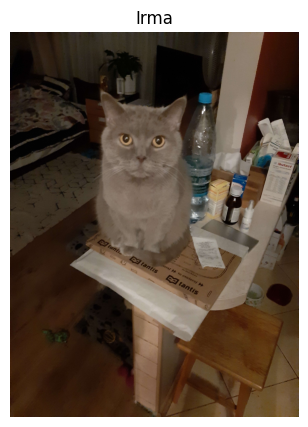

In [7]:
show_images([img], ['Irma'])

<h3>Histogramy skali szarości i kanałów R, G, B</h3>

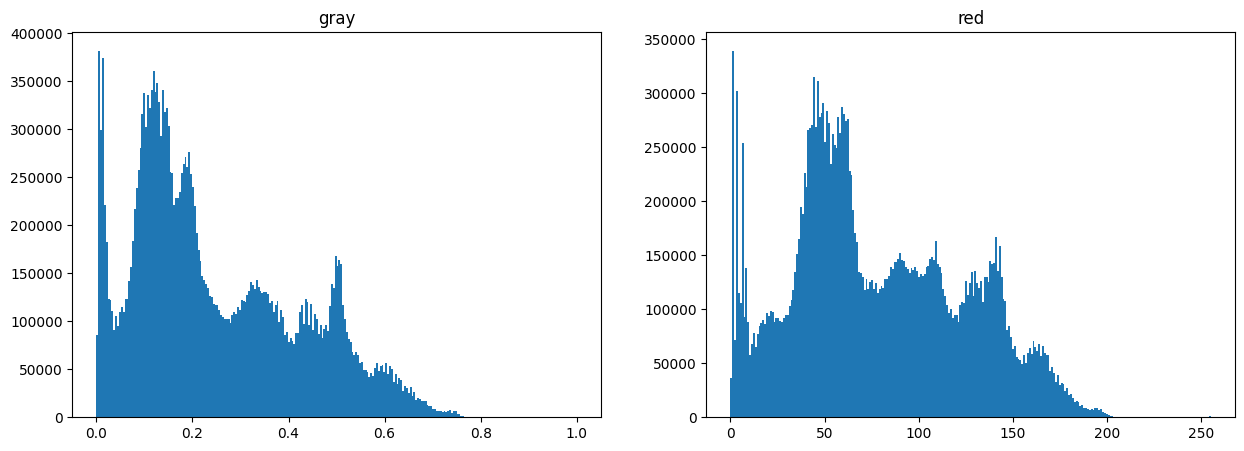

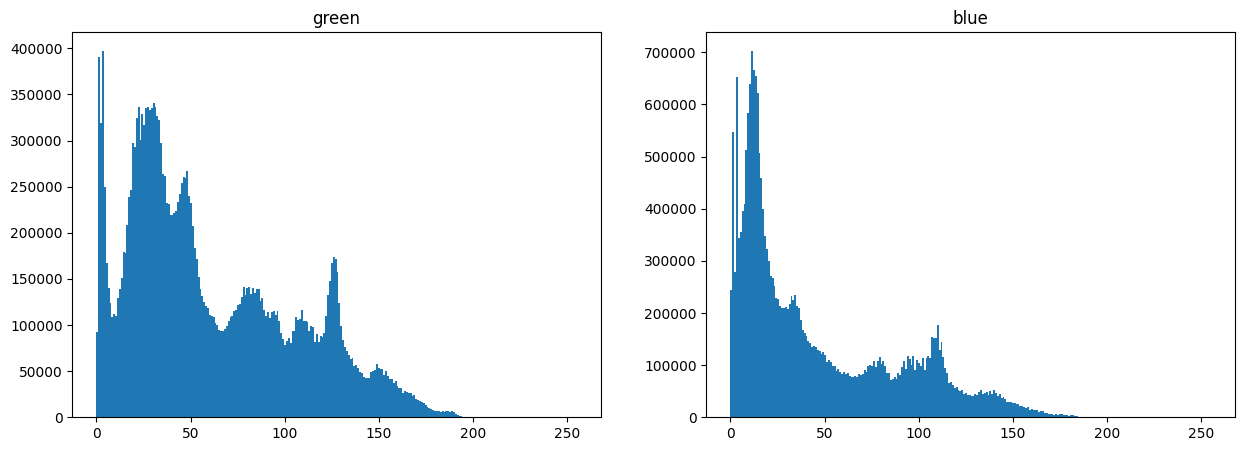

In [8]:
from skimage import color

# show histograms
def show_histograms(data, binss, titles):
    _, axes = plt.subplots(1, len(data))
    for ax, dt, bn, tt in zip(np.atleast_1d(axes), data, binss, titles):
        ax.set_title(tt)
        ax.hist(dt, bins=bn)
    plt.show()

gray = color.rgb2gray(img)
red = img[... ,0]
green = img[..., 1]
blue = img[... ,2]
show_histograms([x.ravel() for x in [gray, red]], [256] * 2, ["gray", "red"])
show_histograms([x.ravel() for x in [green, blue]], [256] * 2, ["green", "blue"])

<h3>Stretching</h3>

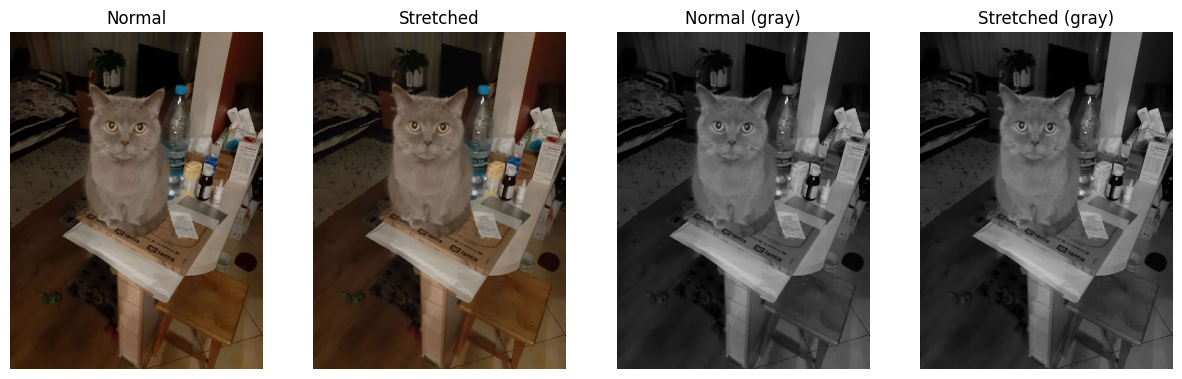

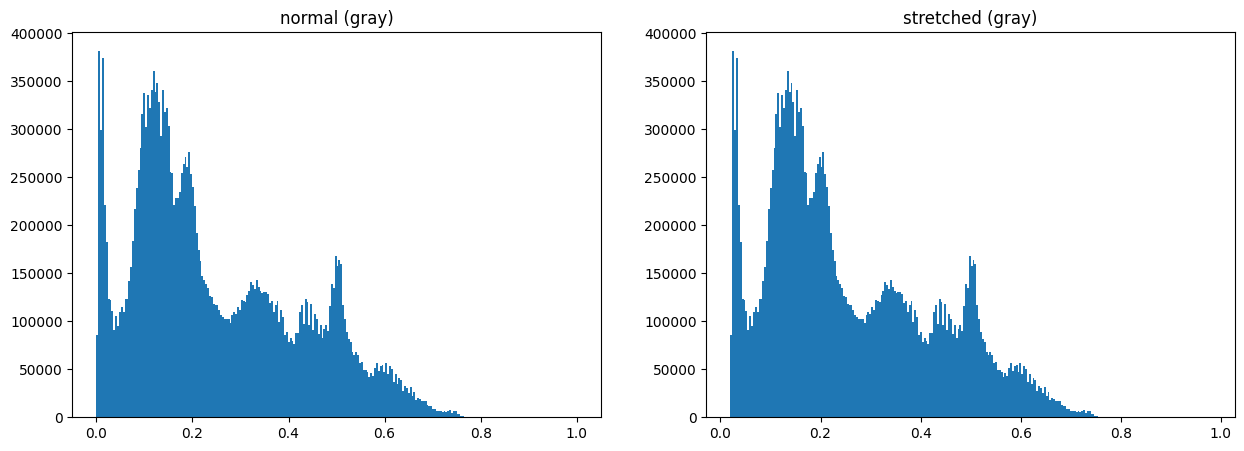

In [17]:
from skimage import exposure

stretched = exposure.rescale_intensity(img, in_range='image', out_range=(.02,.98))
gray_stretched = color.rgb2gray(stretched)
show_images([img, stretched, gray, gray_stretched], ["Normal", "Stretched", "Normal (gray)", "Stretched (gray)"], [None, None, 'gray', 'gray'])
show_histograms([gray.ravel(), gray_stretched.ravel()], [256] * 2, ["normal (gray)", "stretched (gray)"])

# Zadanie 2.

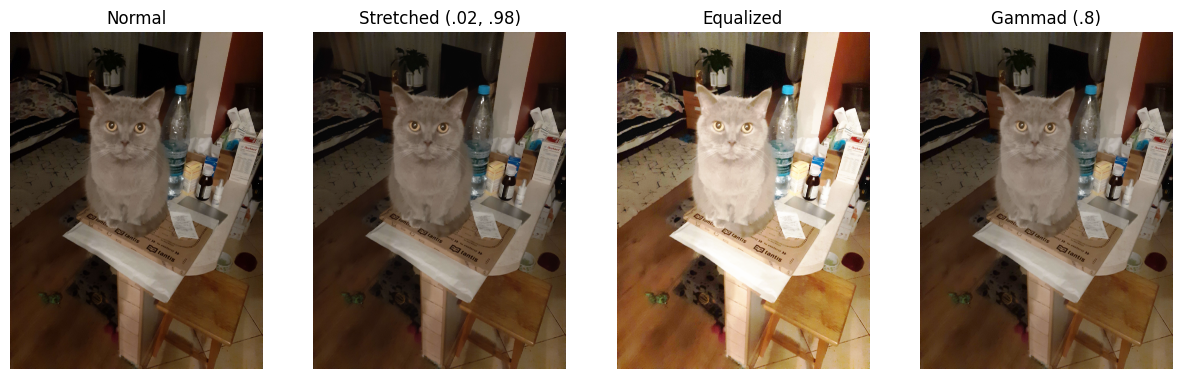

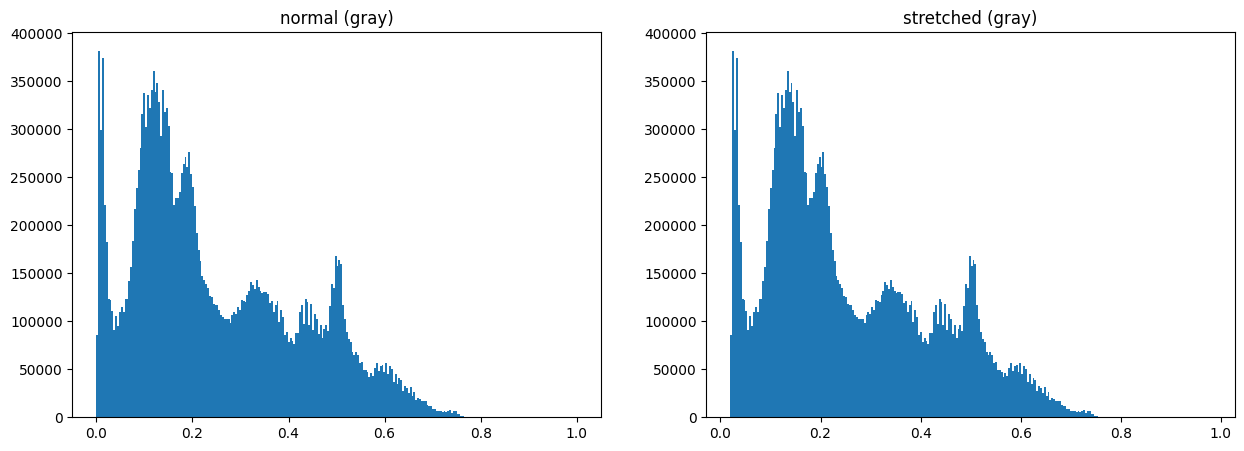

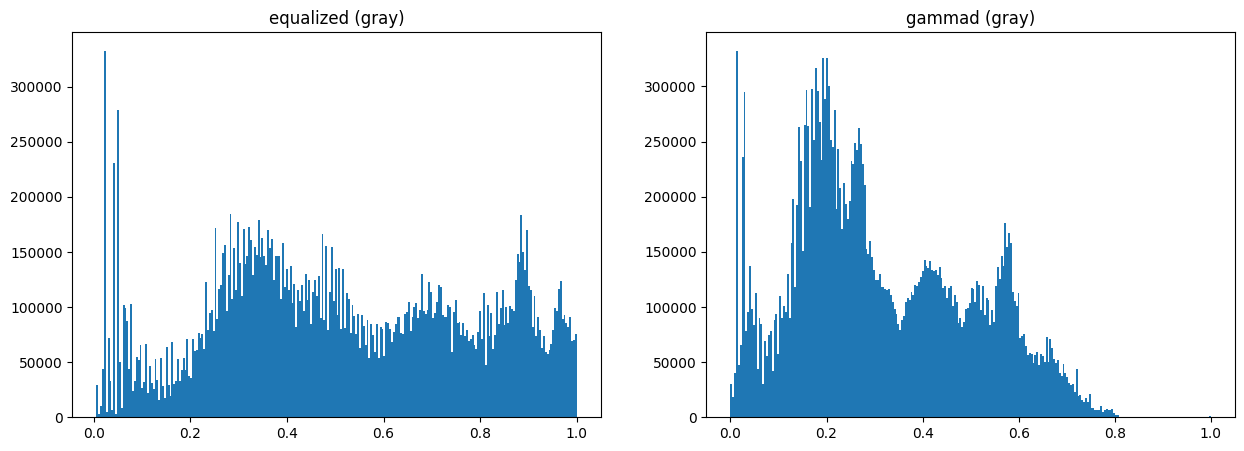

In [18]:
equalized = exposure.equalize_hist(img)
gammad = exposure.adjust_gamma(img, gamma=0.8)
gray_equalized = color.rgb2gray(equalized)
gray_gammad = color.rgb2gray(gammad)
show_images([img, stretched, equalized, gammad], ["Normal", "Stretched (.02, .98)", "Equalized", "Gammad (.8)"])
show_histograms([gray.ravel(), gray_stretched.ravel()], [256] * 2, ["normal (gray)", "stretched (gray)"])
show_histograms([gray_equalized.ravel(), gray_gammad.ravel()], [256] * 2, ["equalized (gray)", "gammad (gray)"])